<a href="https://colab.research.google.com/github/cam2149/AnalisisDatosI/blob/main/Entregable_AnalisisMultivariado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p><img height="45px" src="https://drive.google.com/uc?id=1dusNXTL_M0CB5BJDB_GCvTKNCqYz10U6"align="left" hspace="10px" vspace="0px"></p>

<h1>Preparación de los datos</h1>


---

# **Introducción**

Cuando se realiza un proceso de comprensión de los datos, es posible encontrar algunos problemas potenciales que deben abordarse antes de la estapa de modelado.
En este entregable, se manejaran algunos problemas frecuentes de calidad de datos y preparar el conjunto de datos correctamente (instancias o atributos duplicados o irrelevantes, valores incorrectos, valores perdidos).
<br>Se realizará exploración de los datos a través de estadistica descriptiva
<br>El archivo CSV proporcionado contiene datos detallados sobre automóviles, incluyendo características técnicas y especificaciones. Los campos incluyen el símbolo de riesgo del seguro, pérdidas normalizadas, marca, tipo de combustible, tipo de aspiración, número de puertas, estilo de carrocería, tipo de tracción, ubicación del motor, distancia entre ejes, longitud, ancho, altura, peso en vacío, tipo de motor, número de cilindros, tamaño del motor, sistema de combustible, diámetro del cilindro, carrera del pistón, relación de compresión, potencia, RPM máxima, consumo en ciudad y en carretera, y precio. Estos datos son útiles para análisis exploratorios y comparativos de vehículos.



In [241]:
# Importar librería pandas y numpy
import pandas as pd
import numpy as np
#import matplotlib.pylab as plt
import matplotlib.pyplot as plt
from IPython.display import Math, Latex
from IPython.core.display import Image
import seaborn as sns

sns.set(color_codes=True)
sns.set(rc={'figure.figsize':(10,6)})


In [242]:
#**Importar los datos**
#Para iniciar, importe la librería pandas y lea el archivo CSV que contiene el *dataset*, utilizando el método ```read_csv()```y
#la dirección URL https://raw.githubusercontent.com/cam2149/eda_couse/main/data/automobile.cs que almacena los datos.

filename = "https://raw.githubusercontent.com/cam2149/eda_couse/main/data/automobile.csv"
# Lista de encabezados o nombres de los atributos
headers = ["factor-riesgo-seguro","perdidas-normalizadas","fabricante","tipo-combustible","aspiracion", "num-puertas","estilo-carroceria",
         "traccion","ubicacion-motor","distancia-entre-ejes", "longitud","anchura","altura","peso-vacio","tipo-motor",
         "num-cilindros", "tamano-motor","sistema-combustible","calibre","carrera","relacion-compresion","caballos-fuerza",
         "pico-rpm","millas_por_galon_ciudad","millas_por_galon_carretera","precio"]

df = pd.read_csv(filename, names= headers, encoding='latin-1', header=1)

Utilice el método ```head()```para visualizar las primeras cinco filas del *data frame*.

In [243]:
# Para ver cómo luce el dataset, utilizamos el método head().
df.head()

,factor-riesgo-seguro,perdidas-normalizadas,fabricante,tipo-combustible,aspiracion,num-puertas,estilo-carroceria,traccion,ubicacion-motor,distancia-entre-ejes,...,tamano-motor,sistema-combustible,calibre,carrera,relacion-compresion,caballos-fuerza,pico-rpm,millas_por_galon_ciudad,millas_por_galon_carretera,precio
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450
4,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.4,8.5,110,5500,19,25,15250


In [244]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 26 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   factor-riesgo-seguro        204 non-null    int64  
 1   perdidas-normalizadas       204 non-null    object 
 2   fabricante                  204 non-null    object 
 3   tipo-combustible            204 non-null    object 
 4   aspiracion                  204 non-null    object 
 5   num-puertas                 204 non-null    object 
 6   estilo-carroceria           204 non-null    object 
 7   traccion                    204 non-null    object 
 8   ubicacion-motor             204 non-null    object 
 9   distancia-entre-ejes        204 non-null    float64
 10  longitud                    204 non-null    float64
 11  anchura                     204 non-null    float64
 12  altura                      204 non-null    float64
 13  peso-vacio                  204 non

In [245]:
# Para ver los tipos datos que tiene dataset, utilizamos el método df.dtypes.
df.dtypes

,0
factor-riesgo-seguro,int64
perdidas-normalizadas,object
fabricante,object
tipo-combustible,object
aspiracion,object
num-puertas,object
estilo-carroceria,object
traccion,object
ubicacion-motor,object
distancia-entre-ejes,float64



## Limpieza de Datos
## Identificar valores perdidos

En nuestro conjunto de datos, los datos perdidos están marcados con un signo de interrogación "?". Para que pandas reconozca la existencia de valores perdidos dentro del *data frame*, es necesarios identificarlos y realizar el replace correspondiente, existen diferentes estrategias para realizar esta transformación.
<br><br>
Identificaremos dentro del variable **precio** los datos en **?** Utilizaremos la función ```.replace(A, B, inplace = True)```para reemplazar A por B. Para poder utilizar esta función, debe importar la librería ```numpy```.


In [246]:
# Find out the number of values which are not numeric
df['precio'].str.isnumeric().value_counts()

# List out the values which are not numeric
df['precio'].loc[df['precio'].str.isnumeric() == False]

#Establecer el valor faltante como media del precio y convertir el tipo de datos a entero
precio = df['precio'].loc[df['precio'] != '?']
pmean = precio.astype(str).astype(int).mean()
df['precio'] = df['precio'].replace('?',pmean).astype(int)
df['precio'].head()

,precio
0,16500
1,16500
2,13950
3,17450
4,15250


In [247]:
from sklearn.impute import KNNImputer

# Construimos el modelo
imputer = KNNImputer(n_neighbors=5, weights="uniform")

# Entrenamos el modelo
imputer.fit(df[["precio"]])

#Reemplazamos los valores nulos
df["precio"] = imputer.transform(df[["precio"]]).ravel()

In [248]:
# Limpieza del campo caballos fuerza de pérdidas
df['caballos-fuerza'].str.isnumeric().value_counts()
caballosfuerza = df['caballos-fuerza'].loc[df['caballos-fuerza'] != '?']
hpmean = caballosfuerza.astype(str).astype(int).mean()
df['caballos-fuerza'] = df['caballos-fuerza'].replace('?',hpmean).astype(int)
df['caballos-fuerza'].head()

,caballos-fuerza
0,111
1,154
2,102
3,115
4,110


In [249]:
# Limpieza del campo perdidas normalizadas de pérdidas
df[df['perdidas-normalizadas']=='?'].count()
nl=df['perdidas-normalizadas'].loc[df['perdidas-normalizadas'] !='?'].count()
nmean=nl.astype(str).astype(int).mean()
df['perdidas-normalizadas'] = df['perdidas-normalizadas'].replace('?',nmean).astype(int)
df['perdidas-normalizadas'].head()

,perdidas-normalizadas
0,164
1,164
2,164
3,164
4,164


In [250]:

# Limpiar el campo num-puertas
# Eliminar los registros que tienen el valor '?'
df['num-puertas'].loc[df['num-puertas'] == '?']
df= df[df['num-puertas'] != '?']
df['num-puertas'].loc[df['num-puertas'] == '?']

,num-puertas


In [251]:
# Cleaning the column pico-rpm
df['pico-rpm'] = pd.to_numeric(df['pico-rpm'],errors='coerce')
df['pico-rpm'].head()

<ipython-input-251-3038f4071e70>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['pico-rpm'] = pd.to_numeric(df['pico-rpm'],errors='coerce')


,pico-rpm
0,5000.0
1,5000.0
2,5500.0
3,5500.0
4,5500.0



* ***Convertir "?" a NaN***

En nuestro conjunto de datos, los datos perdidos están marcados con un signo de interrogación "?". Otra estrategia es usar el marcador predeterminado que utiliza Python es **NaN (Not a Number)**.
<br><br>
Utilizaremos la función ```.replace(A, B, inplace = True)```para reemplazar A por B. Para poder utilizar esta función, debe importar la librería ```numpy```.

In [252]:
import numpy as np

# Reemplazar "?" por NaN
df.replace("?", np.nan, inplace = True)
df.head(5)

<ipython-input-252-c94a5564afed>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.replace("?", np.nan, inplace = True)


,factor-riesgo-seguro,perdidas-normalizadas,fabricante,tipo-combustible,aspiracion,num-puertas,estilo-carroceria,traccion,ubicacion-motor,distancia-entre-ejes,...,tamano-motor,sistema-combustible,calibre,carrera,relacion-compresion,caballos-fuerza,pico-rpm,millas_por_galon_ciudad,millas_por_galon_carretera,precio
0,3,164,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000.0,21,27,16500.0
1,1,164,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000.0,19,26,16500.0
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500.0,24,30,13950.0
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500.0,18,22,17450.0
4,2,164,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.4,8.5,110,5500.0,19,25,15250.0


* ***Evaluar los datos perdidos***
Una vez convertidos los datos perdidos a los valores predeterminados de Python, pasamos a utilizar funciones integradas de Python que nos permiten identificar estos datos. Hay tres métodos para detectar valores perdidos: ```.isnull()```, ```.notnull()``` y ```.isna()```. Sus salidas son un valor booleano que indica si el valor que se pasa en los argumentos es un dato perdido.

In [253]:
missing_data = df.isnull()
missing_data.head(5)

,factor-riesgo-seguro,perdidas-normalizadas,fabricante,tipo-combustible,aspiracion,num-puertas,estilo-carroceria,traccion,ubicacion-motor,distancia-entre-ejes,...,tamano-motor,sistema-combustible,calibre,carrera,relacion-compresion,caballos-fuerza,pico-rpm,millas_por_galon_ciudad,millas_por_galon_carretera,precio
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


En el ejemplo anterior, "True" significa valor perdido, mientras que "False" significa valor no perdido.

* ***Contar los valores perdidos de cada columna***

Utilizando un bucle ```for``` podemos calcular el número de valores perdidos de cada columna. Como se mencionó anteriormente, "True" representa un valor faltante, mientras que "False" significa que el valor sí está presente en el conjunto de datos. En el cuerpo del bucle ```for``` que ejecutará a continuación, el método ```.value_counts()``` cuenta el número de valores "True".

In [254]:
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")

factor-riesgo-seguro
factor-riesgo-seguro
False    202
Name: count, dtype: int64

perdidas-normalizadas
perdidas-normalizadas
False    202
Name: count, dtype: int64

fabricante
fabricante
False    202
Name: count, dtype: int64

tipo-combustible
tipo-combustible
False    202
Name: count, dtype: int64

aspiracion
aspiracion
False    202
Name: count, dtype: int64

num-puertas
num-puertas
False    202
Name: count, dtype: int64

estilo-carroceria
estilo-carroceria
False    202
Name: count, dtype: int64

traccion
traccion
False    202
Name: count, dtype: int64

ubicacion-motor
ubicacion-motor
False    202
Name: count, dtype: int64

distancia-entre-ejes
distancia-entre-ejes
False    202
Name: count, dtype: int64

longitud
longitud
False    202
Name: count, dtype: int64

anchura
anchura
False    202
Name: count, dtype: int64

altura
altura
False    202
Name: count, dtype: int64

peso-vacio
peso-vacio
False    202
Name: count, dtype: int64

tipo-motor
tipo-motor
False    202
Name: count, dtype:

Según el resultado anterior, cada columna tiene 205 filas de datos, y existen siete filas que contienen valores perdidos:

1.   "calibre": 4 valores perdidos
2.   "carrera" : 4 valores perdidos
3.   "pico-rpm": 2 valores perdidos


Para contar los valores perdidos que hay en cada atributo, también puede utilizar la función ```.sum()``` después de cualquiera de las funciones para detectar valores perdidos en el *data frame* (```.isnull()```, ```.notnull()```, y ```.isna()```). Esta función sumará todos los valores *True* y proporcionará un resumen para cada atributo, además no tendrá necesidad de utilizar un bucle.
<br><br>
**Vea el resumen de los valores perdidos para los atributos del dataset.** Ingrese sus líneas de código a continuación:

In [255]:
#Escriba su código a continuación y presione Shift + Enter para ejecutar
df.isna().sum()


,0
factor-riesgo-seguro,0
perdidas-normalizadas,0
fabricante,0
tipo-combustible,0
aspiracion,0
num-puertas,0
estilo-carroceria,0
traccion,0
ubicacion-motor,0
distancia-entre-ejes,0


In [256]:
df.isnull().sum()

,0
factor-riesgo-seguro,0
perdidas-normalizadas,0
fabricante,0
tipo-combustible,0
aspiracion,0
num-puertas,0
estilo-carroceria,0
traccion,0
ubicacion-motor,0
distancia-entre-ejes,0


## Lidiar con valores perdidos

Cuando tenemos un *dataset* con valores perdidos, podemos tomar las siguientes decisiones:

* Eliminar datos
 *   Eliminar toda la fila
 *   Eliminar toda la columna

* Reemplazar datos
 *   Reemplazar por la media (o promedio)
 *   Reemplazar por la frecuencia
 *   Reemplazar en función de otras funciones


Tenga en cuenta que una columna entera se puede descartar solo si la mayoría de sus valores están vacíos. En nuestro conjunto de datos, ninguna de las columnas está lo suficientemente vacía como para eliminarla por completo, así que reemplazaremos los valores perdidos. En este punto, tenemos cierta libertad para elegir el método de reemplazo, sin embargo, algunos métodos pueden parecer más razonables que otros. Aquí aplicaremos cada método a diferentes columnas:
<br><br>
* ***REEMPLAZAR POR LA MEDIA:*** <br>
"num-puertas", "carrera", "calibre" y "pico-rpm".

Para empezar, necesitamos conocer la media de las columnas donde se hará el reemplazo por media. Entonces, debemos calcular el promedio de dichas columnas. En el siguiente ejemplo hacemos el cálculo de tres de ellas:

In [257]:
# Promedio/media de la columna carrera
avg_carrera = df["carrera"].astype("float").mean()

# Promedio/media de la columna calibre
avg_calibre = df["calibre"].astype("float").mean()

# Imprimir los resultados
print("Promedio de carrera:", avg_carrera)
print("Promedio de calibre:", avg_calibre)

Promedio de carrera: 3.2569696969696964
Promedio de calibre: 3.3302525252525252


Luego, reemplazamos "NaN" por el valor promedio de la columna donde deseamos hacer el reemplazo. Veamos el reemplazo para las tres columnas anteriores, utilizando el método ```replace()```:

In [258]:
# Reemplazo de NaN por la media, columna carrera
df["carrera"].replace(np.nan, avg_carrera, inplace=True)

# Reemplazo de NaN por la media, columna bore
df["calibre"].replace(np.nan, avg_calibre, inplace=True)

Podemos verificar los cambios en el *data frame*:

In [259]:
df.head(5)

,factor-riesgo-seguro,perdidas-normalizadas,fabricante,tipo-combustible,aspiracion,num-puertas,estilo-carroceria,traccion,ubicacion-motor,distancia-entre-ejes,...,tamano-motor,sistema-combustible,calibre,carrera,relacion-compresion,caballos-fuerza,pico-rpm,millas_por_galon_ciudad,millas_por_galon_carretera,precio
0,3,164,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000.0,21,27,16500.0
1,1,164,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000.0,19,26,16500.0
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500.0,24,30,13950.0
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500.0,18,22,17450.0
4,2,164,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.4,8.5,110,5500.0,19,25,15250.0


El método ```.fillna()``` de pandas también nos permite hacer reemplazos, sólo debemos proporcionarle dos parámetros: el valor que imputaremos y ```inplace = True```
<br><br>
**De acuerdo con el ejemplo anterior, reemplace NaN por el promedio en la columna "caballos-fuerza" utilizando el método ```replace()```, y en la columna "pico-rpm" utilizando el método ```fillna()```**. Ingrese sus líneas de código a continuación:

In [260]:
# prompt: En la columna "pico-rpm" utilizando el método fillna()

# Promedio/media de la columna pico-rpm
avg_pico_rpm = df["pico-rpm"].astype("float").mean()

# Reemplazo de NaN por la media, columna pico-rpm
df["pico-rpm"].fillna(avg_pico_rpm, inplace=True)


In [261]:
df['num-puertas'].value_counts()

,count
num-puertas,
four,114
two,88


In [262]:
# Revisamos porcentajes
df['num-puertas'].value_counts("normalize = True")

,proportion
num-puertas,
four,0.564356
two,0.435644


El procedimiento de reemplazo es muy similar al que vimos anteriormente.

In [263]:
# Reemplazar los valores perdidos de'num-puertas' por el valor más frecuente
df["num-puertas"].replace(np.nan, "four", inplace=True)

In [264]:
df.isnull().sum()

,0
factor-riesgo-seguro,0
perdidas-normalizadas,0
fabricante,0
tipo-combustible,0
aspiracion,0
num-puertas,0
estilo-carroceria,0
traccion,0
ubicacion-motor,0
distancia-entre-ejes,0


* ***ELIMINAR TODA LA FILA:***<br>
"precio". El precio es lo que queremos predecir. Cualquier instancia sin precio no puede ser utilizada porque no será util para aprender de ella.

El paquete pandas proporciona un método que podemos usar para eliminar fácilmente los valores faltantes: ```.dropna()```. Este método devuelve un nuevo DataFrame sin las filas que tienen valores perdidos. De forma predeterminada, evalúa los valores perdidos de todas las columnas, pero Usted puede especificar una lista de columnas para que centre su búsqueda en esos atributos:

```df.dropna (subset = ['columna'])```
<br><br>
Este método devuelve un nuevo *DataFrame* sin valores perdidos para las columnas especificadas. Si desea reemplazar el conjunto de datos original directamente, puede usar el parámetro ```inplace = True```:

```df.dropna(subset=['columna'], inplace=True)```
<br><br>
Entonces, eliminemos todas las instancias que no tienen datos en el atributo "precio", utilizando el método ```.dropna()```:

In [265]:
# Elimine la fila/instancia completa que tiene valor NaN en la columna "precio"
df.dropna(subset=["precio"], axis=0, inplace=True)

# Restablezca el índice del dataframe porque se eliminaron dos filas
df.reset_index(drop=True, inplace=True)

Verifiquemos nuevamente cuántos valores perdidos tiene el conjunto de datos

In [266]:
df.isna().sum()

,0
factor-riesgo-seguro,0
perdidas-normalizadas,0
fabricante,0
tipo-combustible,0
aspiracion,0
num-puertas,0
estilo-carroceria,0
traccion,0
ubicacion-motor,0
distancia-entre-ejes,0


**Muy bien!** Ahora, tenemos el *dataset* sin valores perdidos.

## Corregir formato de datos

El último paso en la limpieza de datos es verificar y asegurarse de que todos los datos estén en el formato correcto (*int*, *float*, *text* u otro). En pandas utilizamos los métodos:
```.dtype()``` para ver los tipos de datos, y ```.astype()``` para cambiar tipos de datos.
<br><br>
Veamos los tipos de datos para cada columna:

In [267]:
df.dtypes

,0
factor-riesgo-seguro,int64
perdidas-normalizadas,int64
fabricante,object
tipo-combustible,object
aspiracion,object
num-puertas,object
estilo-carroceria,object
traccion,object
ubicacion-motor,object
distancia-entre-ejes,float64


In [268]:
df[["calibre", "carrera"]] = df[["calibre", "carrera"]].astype("float")
df[["precio"]] = df[["precio"]].astype("float")
df[["pico-rpm"]] = df[["pico-rpm"]].astype("float")

Veamos los tipos de datos de los atributos después de la conversión:

In [269]:
df.dtypes

,0
factor-riesgo-seguro,int64
perdidas-normalizadas,int64
fabricante,object
tipo-combustible,object
aspiracion,object
num-puertas,object
estilo-carroceria,object
traccion,object
ubicacion-motor,object
distancia-entre-ejes,float64


In [270]:
# Veamos las columnas actuales de nuestro dataframe
df.head()

,factor-riesgo-seguro,perdidas-normalizadas,fabricante,tipo-combustible,aspiracion,num-puertas,estilo-carroceria,traccion,ubicacion-motor,distancia-entre-ejes,...,tamano-motor,sistema-combustible,calibre,carrera,relacion-compresion,caballos-fuerza,pico-rpm,millas_por_galon_ciudad,millas_por_galon_carretera,precio
0,3,164,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000.0,21,27,16500.0
1,1,164,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000.0,19,26,16500.0
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500.0,24,30,13950.0
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500.0,18,22,17450.0
4,2,164,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500.0,19,25,15250.0


In [271]:
df.describe()

,factor-riesgo-seguro,perdidas-normalizadas,distancia-entre-ejes,longitud,anchura,altura,peso-vacio,tamano-motor,calibre,carrera,relacion-compresion,caballos-fuerza,pico-rpm,millas_por_galon_ciudad,millas_por_galon_carretera,precio
count,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000
mean,0.826733,129.980198,98.831683,174.139604,65.924257,53.755941,2557.965347,127.059406,3.330253,3.256970,10.098614,104.430693,5126.500000,25.193069,30.717822,13240.618812
std,1.243762,35.966258,6.013061,12.364039,2.151791,2.423638,523.854860,41.900456,0.271823,0.313019,3.897109,39.708110,478.542304,6.539383,6.886758,7918.562647
min,-2.000000,65.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,101.000000,94.500000,166.425000,64.125000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7778.250000
50%,1.000000,128.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,119.500000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10470.000000
75%,2.000000,164.000000,102.400000,183.400000,66.900000,55.500000,2947.750000,144.000000,3.587500,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000
max,3.000000,256.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [272]:
# Convertir mpg a Kpg con una operación matemática
df['millas_por_galon_ciudad'] = df["millas_por_galon_ciudad"]*1.60934
df['millas_por_galon_carretera'] = df["millas_por_galon_carretera"]*1.60934
df.rename(columns={'millas_por_galon_carretera':'carretera-Kpg'}, inplace=True)
df.rename(columns={'millas_por_galon_ciudad':'ciudad-Kpg'}, inplace=True)
# Verifiquemos las columnas para visualizar la transformación de los datos
df.head()

,factor-riesgo-seguro,perdidas-normalizadas,fabricante,tipo-combustible,aspiracion,num-puertas,estilo-carroceria,traccion,ubicacion-motor,distancia-entre-ejes,...,tamano-motor,sistema-combustible,calibre,carrera,relacion-compresion,caballos-fuerza,pico-rpm,ciudad-Kpg,carretera-Kpg,precio
0,3,164,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000.0,33.79614,43.45218,16500.0
1,1,164,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000.0,30.57746,41.84284,16500.0
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500.0,38.62416,48.28020,13950.0
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500.0,28.96812,35.40548,17450.0
4,2,164,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500.0,30.57746,40.23350,15250.0


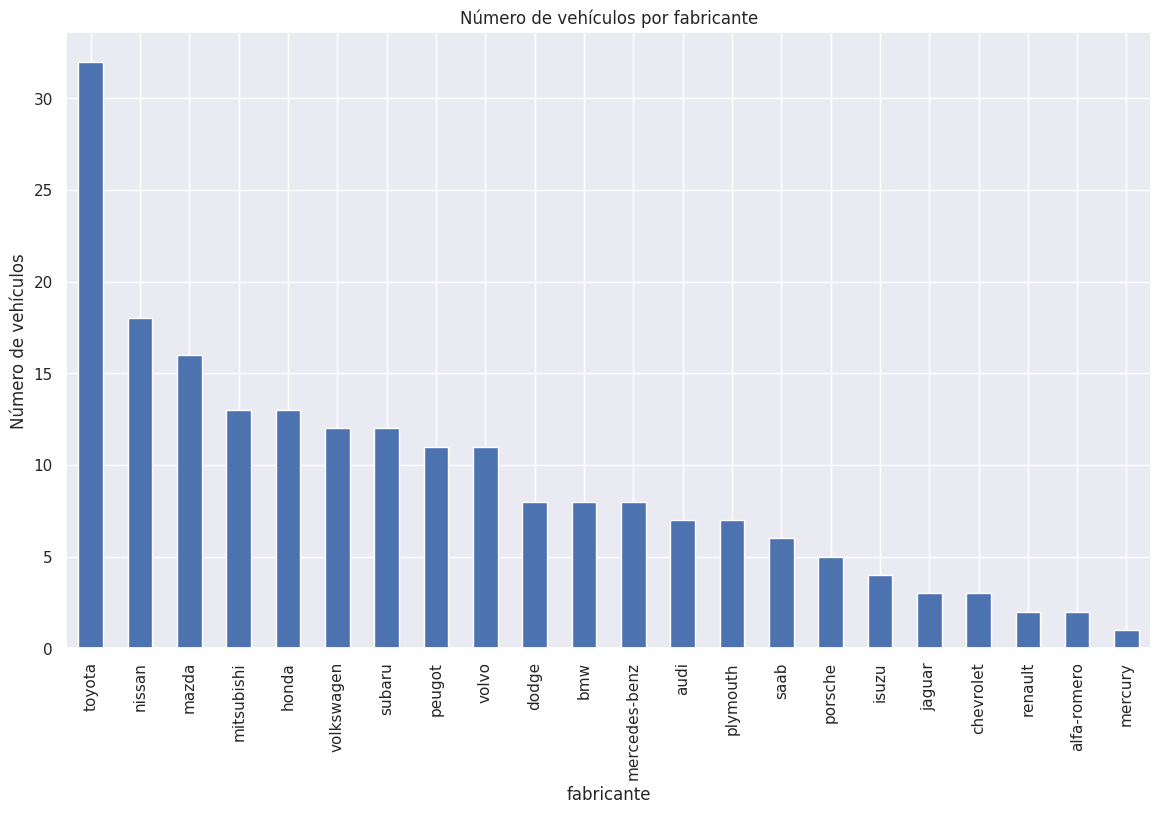

In [273]:
import matplotlib.pyplot as plt

df.fabricante.value_counts().nlargest(30).plot(kind='bar', figsize=(14,8))
plt.title("Número de vehículos por fabricante")
plt.ylabel('Número de vehículos')
plt.xlabel('fabricante');

In [274]:
traccion_count =df["traccion"].value_counts()
print(traccion_count)

traccion
fwd    118
rwd     75
4wd      9
Name: count, dtype: int64


In [275]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
plt.rcParams['figure.figsize'] = (10, 6)

Text(0, 0.5, 'precio')

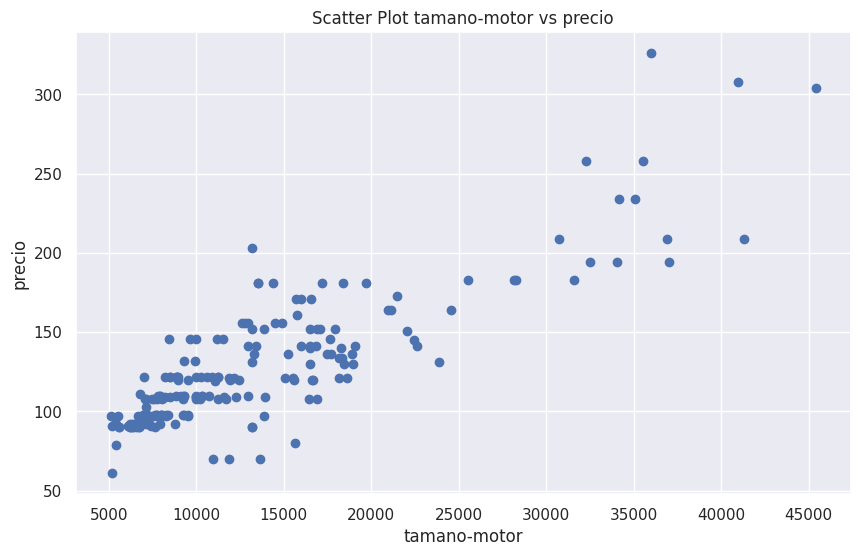

In [276]:
# Grafico de la relación entre “tamaño del motor” y “precio”
plt.scatter(df["precio"], df["tamano-motor"])
plt.title("Scatter Plot tamano-motor vs precio")
plt.xlabel("tamano-motor")
plt.ylabel("precio")

<Axes: xlabel='traccion', ylabel='precio'>

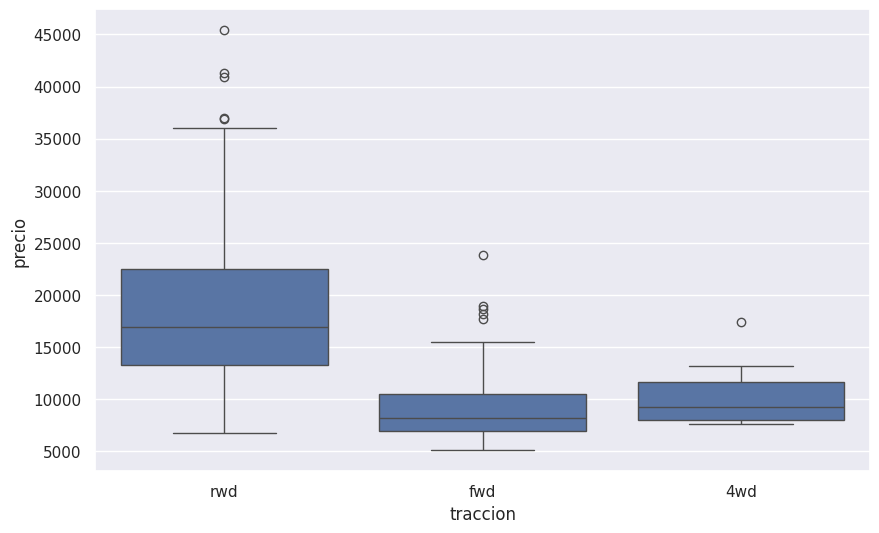

In [277]:
#boxplot to visualize the distribution of "price" with types of "drive-wheels"
sns.boxplot(x="traccion", y="precio",data=df)

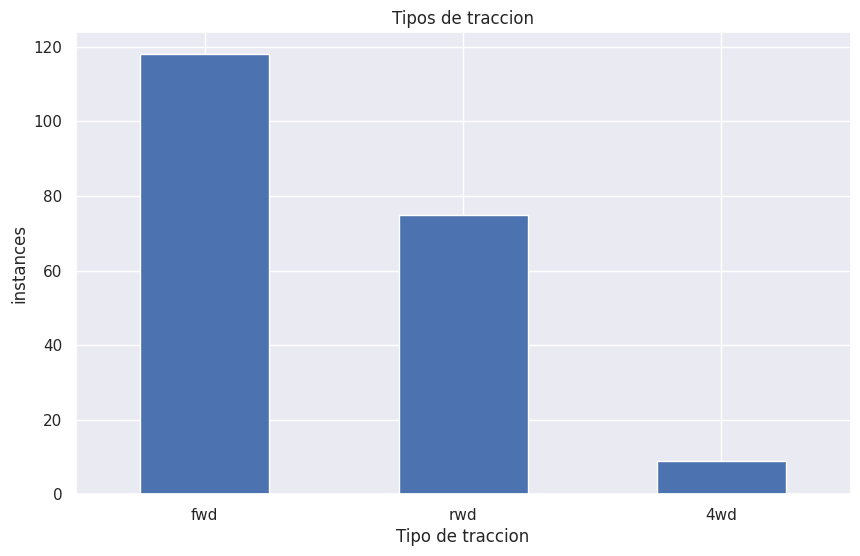

In [278]:
df.traccion.value_counts().plot(kind="bar")
plt.title("Tipos de traccion")
plt.xlabel("Tipo de traccion")
plt.xticks(rotation=0)
plt.ylabel("instances")
plt.show()

In [279]:
df['ciudad-Kpg'].describe()

,ciudad-Kpg
count,202.000000
mean,40.544214
std,10.524091
min,20.921420
25%,30.577460
50%,38.624160
75%,48.280200
max,78.857660


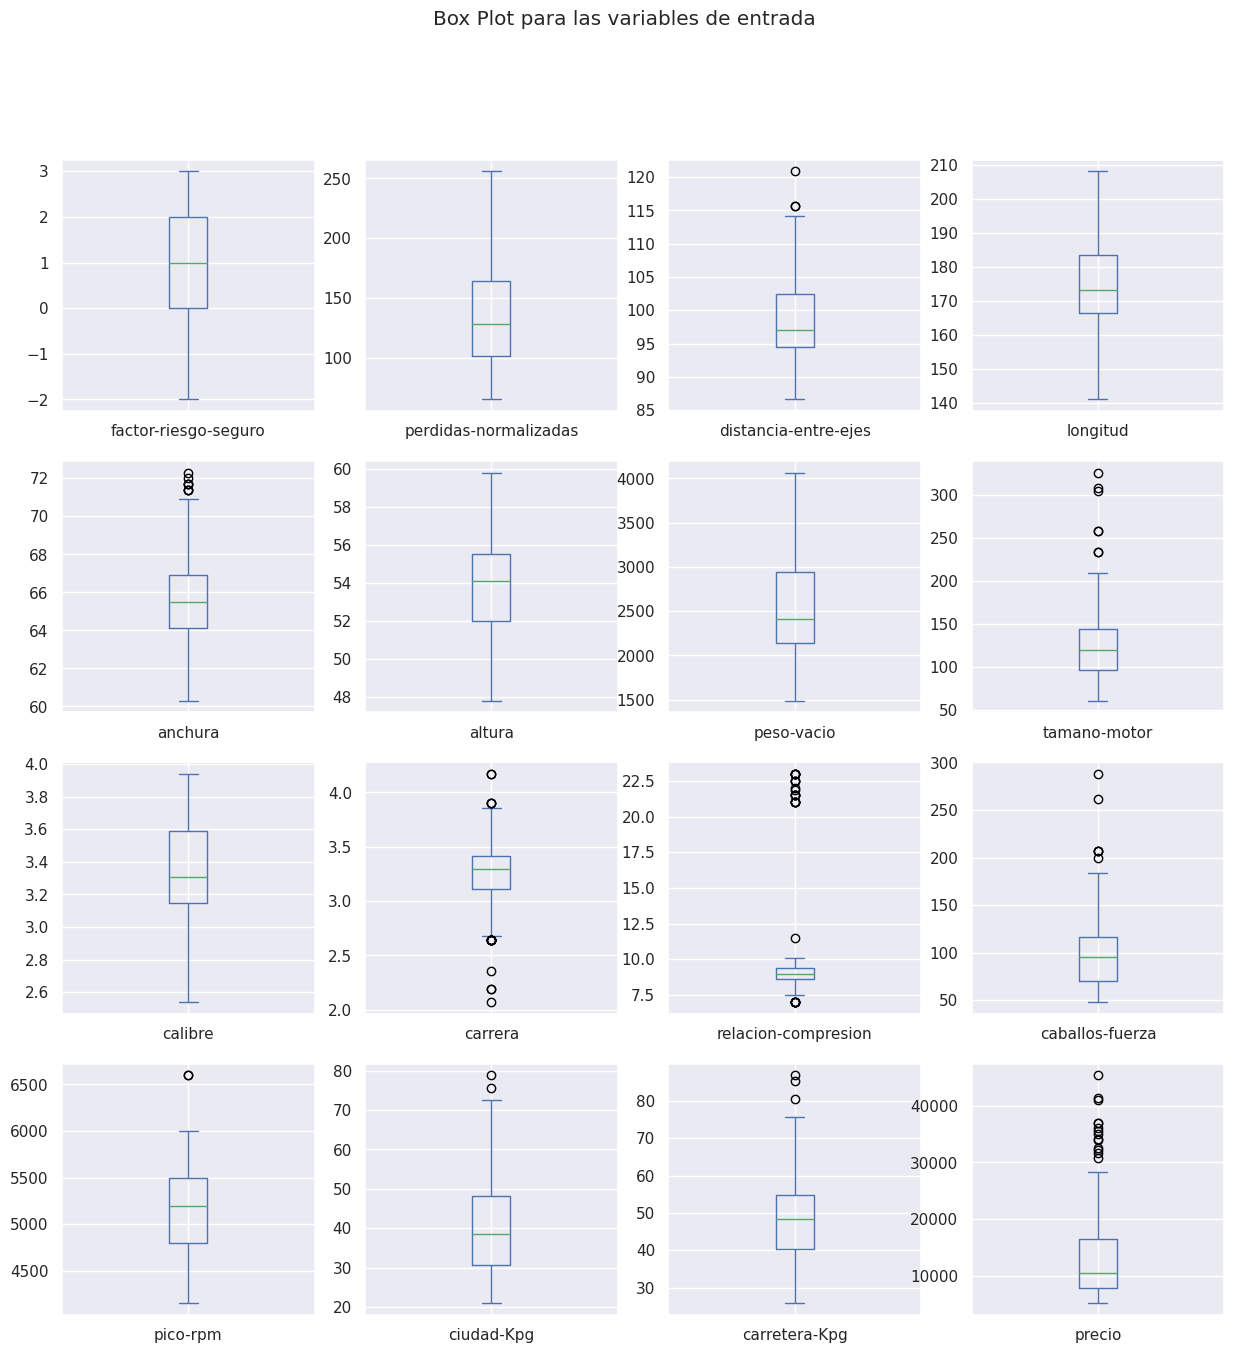

In [280]:
df.drop('sistema-combustible', axis=1).plot(kind='box', subplots=True, layout=(4,4), sharex=False, sharey=False, figsize=(15,15), title='Box Plot para las variables de entrada')
#plt.savefig('vino')
plt.show()

<Axes: >

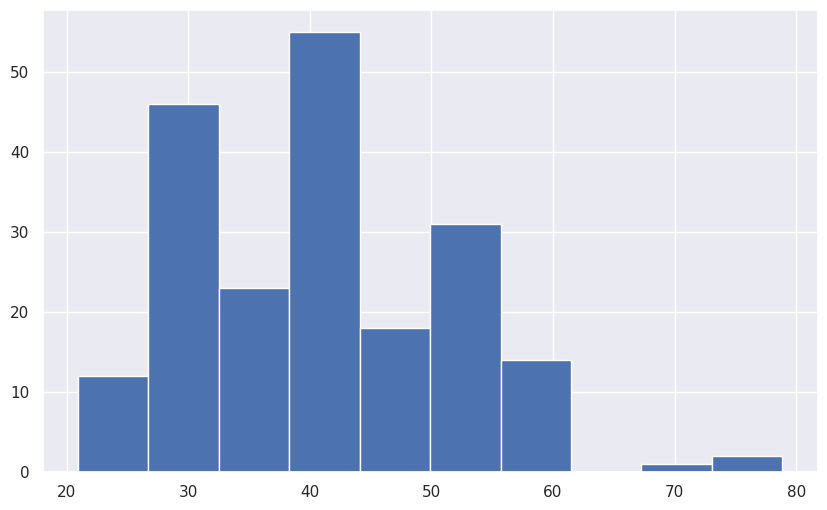

In [281]:
# Histograma del ciudad-Kpg
df['ciudad-Kpg'].hist()

<Axes: >

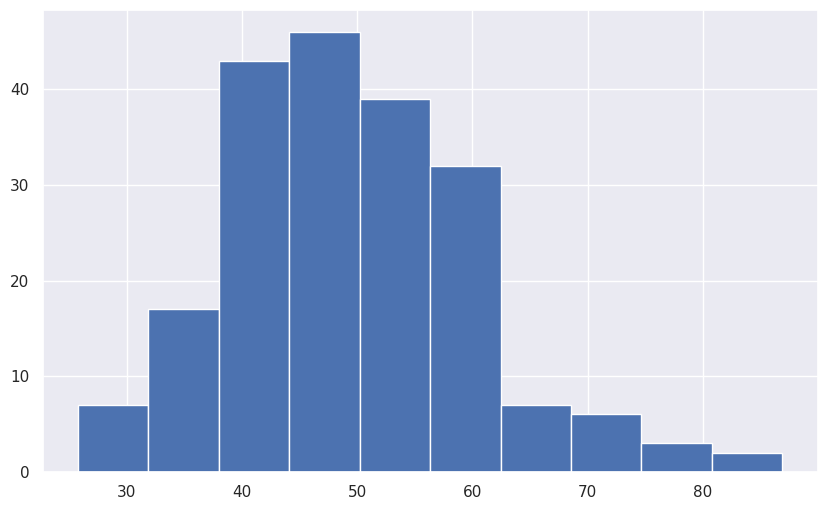

In [282]:
# Histograma del carretera-Kpg
df['carretera-Kpg'].hist()

In [283]:
# Evaluamos la distribución
# https://www.itl.nist.gov/div898/handbook/eda/section3/eda35b.htm

print(f"Skewness: {df['ciudad-Kpg'].skew()}")
print(f"Kurtosis: {df['ciudad-Kpg'].kurt()}")

Skewness: 0.665683462966726
Kurtosis: 0.6120074158777329


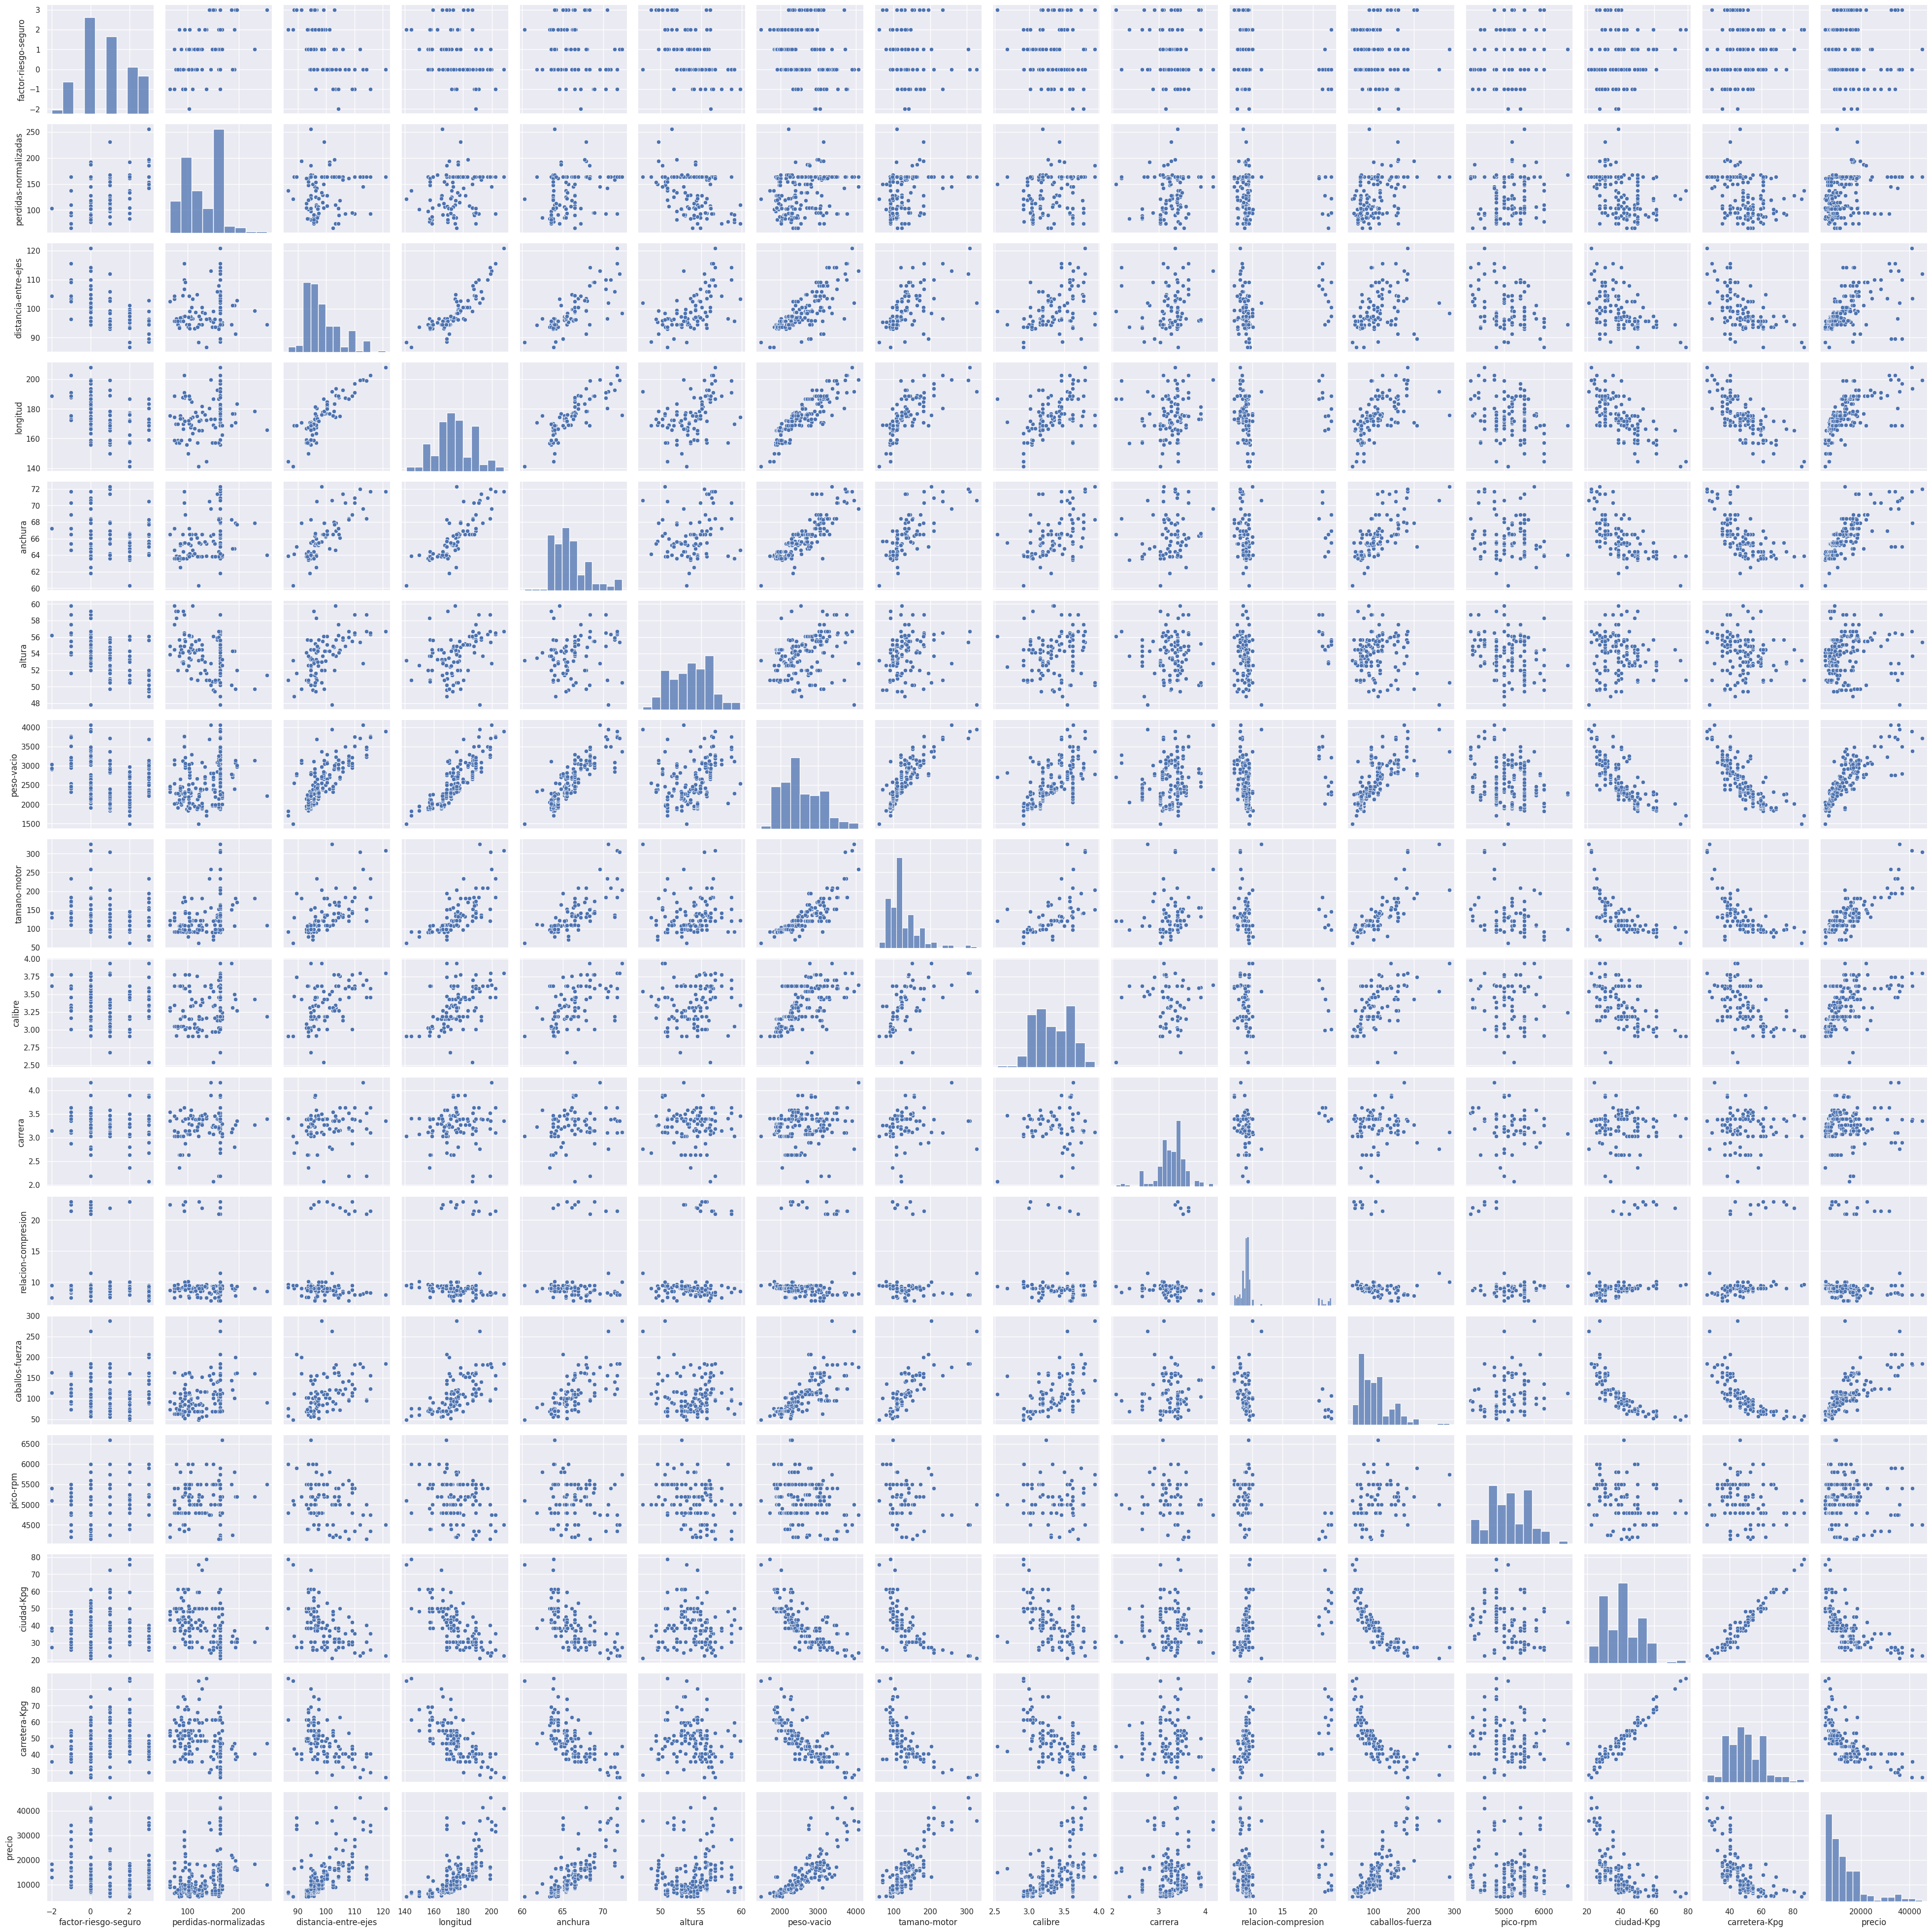

In [284]:
sns.pairplot(df)

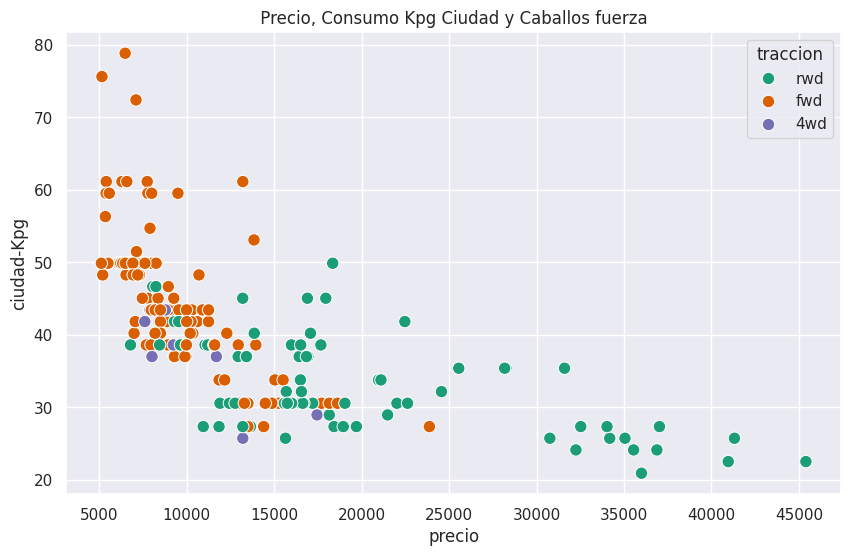

In [285]:
# Relación entre Precio, Flavanoids y Vino
# Esta grafica nos permite ver que relaciones existen y como podemos analizarlo

sns.scatterplot(x="precio", y="ciudad-Kpg", hue="traccion", data=df, palette="Dark2", s=80)
plt.title(" Precio, Consumo Kpg Ciudad y Caballos fuerza ")
plt.show()

## Correlación entre variables



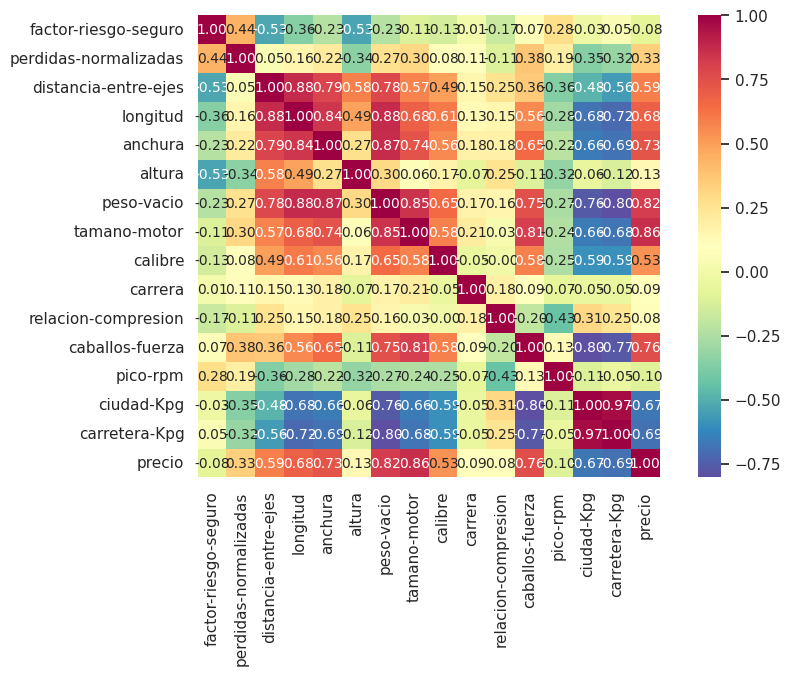

In [286]:
# Correlacion entre variables
numeric_df = df.select_dtypes(include=['number'])
corrmat = numeric_df.corr()

hm = sns.heatmap(corrmat,
                 cbar=True,
                 annot=True,
                 square=True,
                 fmt='.2f',
                 annot_kws={'size': 10},
                 yticklabels=numeric_df.columns,
                 xticklabels=numeric_df.columns,
                 cmap="Spectral_r")
plt.show()

#Las variables con mayor correlación positiva son:
 1. distancia-entre-ejes y longitud con un valor de 0.87
 2. anchura y distancia-entre-ejes con un valor de 0.81
 3. anchura y longitud con un valor de 0.89
 4. peso-vacio y tamano-motor con un valor de 0.85
 5. precio y tamano-motor con un valor de 0.87
 6. caballos-fuerza y tamano-motor con un valor de 0.82
 7. precio y caballos-fuerza con un valor de 0.81

#Las variables con mayor correlación negativa son:
 1. ciudad-Kpg y tamano-motor con un valor de -0.75
 2. carretera-Kpg y tamano-motor con un valor de -0.68
 3. ciudad-Kpg y caballos-fuerza con un valor de -0.67
 4. carretera-Kpg y caballos-fuerza con un valor de -0.60

Se toma la correlacióna precio y tamano-motor con un valor de 0.87 para analizar

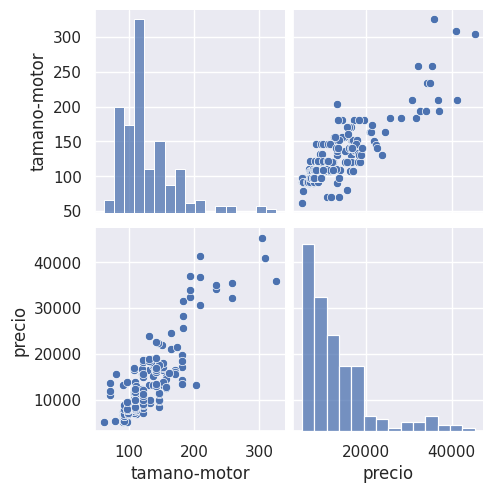

In [287]:
# prompt: sns.pairplot de solo la relacion entre tamano-motor y precio

sns.pairplot(df, vars=["tamano-motor", "precio"])


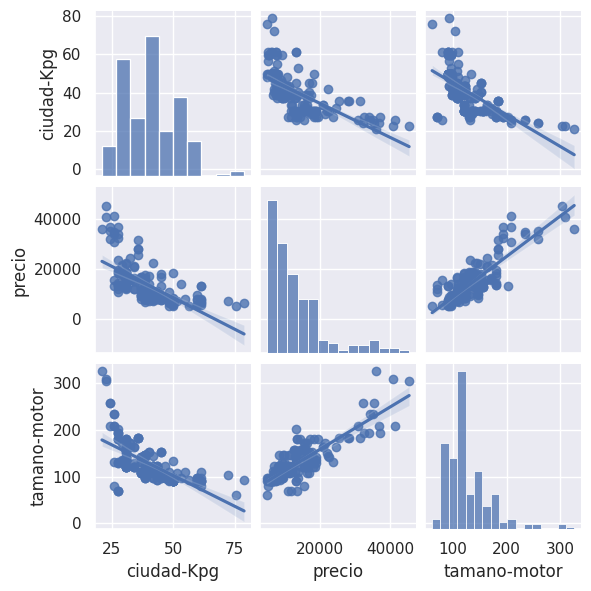

In [288]:
# pair plot with plot type regression
sns.pairplot(df,height=2, vars = ['ciudad-Kpg', 'precio','tamano-motor'],  kind="reg")
plt.show()

## Analsis de Correlación:

## Analisis de Correlación: Pearson




In [289]:
from scipy import stats

corr = stats.pearsonr(df["precio"], df["tamano-motor"])
print("p-value:\t", corr[1])
print("cor:\t\t", corr[0])

p-value:	 8.565678354969199e-61
cor:		 0.861546091207974


In [308]:
numeric_df = df.select_dtypes(include=['number'])
correlationPearson = numeric_df.corr(method='pearson')
correlationPearson

,factor-riesgo-seguro,perdidas-normalizadas,distancia-entre-ejes,longitud,anchura,altura,peso-vacio,tamano-motor,calibre,carrera,relacion-compresion,caballos-fuerza,pico-rpm,ciudad-Kpg,carretera-Kpg,precio
factor-riesgo-seguro,1.000000,0.442789,-0.526057,-0.356981,-0.227072,-0.533326,-0.230077,-0.107392,-0.134636,0.008430,-0.171236,0.067400,0.275654,-0.025228,0.045377,-0.083922
perdidas-normalizadas,0.442789,1.000000,0.053304,0.160631,0.216974,-0.344265,0.266660,0.304064,0.080313,0.108590,-0.112701,0.378190,0.191071,-0.352710,-0.315855,0.331201
distancia-entre-ejes,-0.526057,0.053304,1.000000,0.877666,0.794443,0.581357,0.781251,0.572796,0.494653,0.150101,0.253595,0.357225,-0.364351,-0.484539,-0.558009,0.586811
longitud,-0.356981,0.160631,0.877666,1.000000,0.840370,0.487179,0.879084,0.683458,0.605263,0.129702,0.153718,0.560268,-0.283520,-0.684814,-0.717914,0.683883
anchura,-0.227072,0.216974,0.794443,0.840370,1.000000,0.268950,0.868770,0.736626,0.560182,0.179218,0.178063,0.648462,-0.217662,-0.656406,-0.690198,0.730347
altura,-0.533326,-0.344265,0.581357,0.487179,0.268950,1.000000,0.296725,0.064988,0.171697,-0.074367,0.253682,-0.107149,-0.321031,-0.063466,-0.121945,0.134309
peso-vacio,-0.230077,0.266660,0.781251,0.879084,0.868770,0.296725,1.000000,0.850254,0.648254,0.172344,0.156842,0.752670,-0.266125,-0.763293,-0.803074,0.820445
tamano-motor,-0.107392,0.304064,0.572796,0.683458,0.736626,0.064988,0.850254,1.000000,0.582844,0.207491,0.029572,0.812989,-0.243718,-0.659039,-0.682525,0.861546
calibre,-0.134636,0.080313,0.494653,0.605263,0.560182,0.171697,0.648254,0.582844,1.000000,-0.050049,-0.001006,0.579791,-0.250653,-0.592568,-0.594612,0.531926
carrera,0.008430,0.108590,0.150101,0.129702,0.179218,-0.074367,0.172344,0.207491,-0.050049,1.000000,0.184729,0.093022,-0.069475,-0.052041,-0.053026,0.085167


Calcula y visualiza la matriz de correlación utilizando un mapa de calor.

<Axes: >

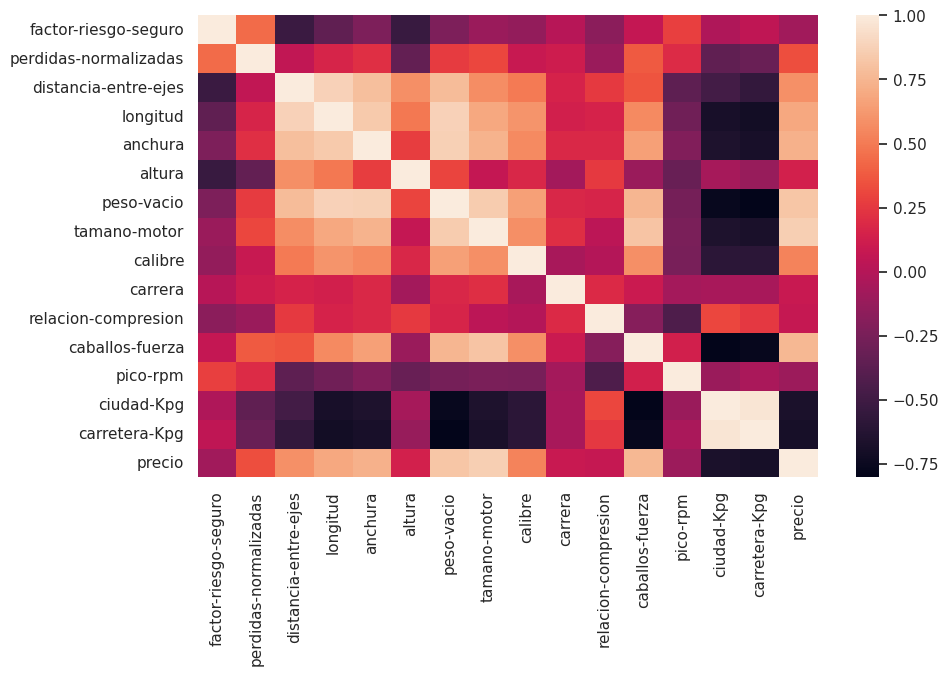

In [309]:
sns.heatmap(correlationPearson,xticklabels=correlationPearson.columns,
            yticklabels=correlationPearson.columns)

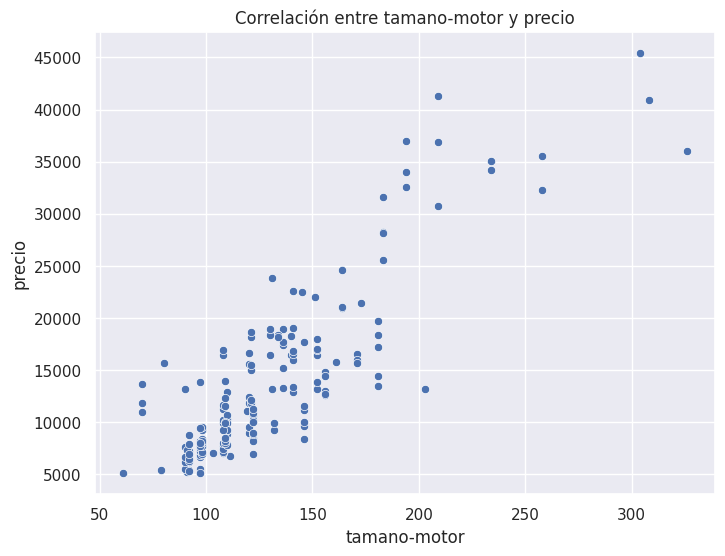

Coeficiente de correlación de Pearson: 0.861546091207975


In [310]:
# prompt: visualizar la correlacion entre dos variables

# Selecciona las dos variables que deseas analizar
variable1 = 'tamano-motor'
variable2 = 'precio'

# Crea un scatter plot para visualizar la correlación
plt.figure(figsize=(8, 6))
sns.scatterplot(x=variable1, y=variable2, data=df)
plt.title(f'Correlación entre {variable1} y {variable2}')
plt.xlabel(variable1)
plt.ylabel(variable2)
plt.show()

# Calcula el coeficiente de correlación de Pearson
correlationPearson = df[variable1].corr(df[variable2], method='pearson')
print(f'Coeficiente de correlación de Pearson: {correlationPearson}')


## Analisis de Correlación: Kendall

In [311]:
from scipy import stats

corrKedall = stats.kendalltau(df["precio"], df["tamano-motor"])
print("p-value:\t", corrKedall[1])
print("cor:\t\t", corrKedall[0])

p-value:	 2.0694089441694978e-40
cor:		 0.6413617291317495


In [312]:
numeric_df = df.select_dtypes(include=['number'])
correlationKendall = numeric_df.corr(method='kendall')
correlationKendall

,factor-riesgo-seguro,perdidas-normalizadas,distancia-entre-ejes,longitud,anchura,altura,peso-vacio,tamano-motor,calibre,carrera,relacion-compresion,caballos-fuerza,pico-rpm,ciudad-Kpg,carretera-Kpg,precio
factor-riesgo-seguro,1.000000,0.315696,-0.404836,-0.287589,-0.165341,-0.407578,-0.179672,-0.141788,-0.137191,0.000171,0.032542,-0.024906,0.219607,0.000696,0.049784,-0.110603
perdidas-normalizadas,0.315696,1.000000,0.015266,0.111281,0.159199,-0.220934,0.184075,0.203943,0.064006,0.066065,-0.086722,0.258654,0.142224,-0.270771,-0.235043,0.263071
distancia-entre-ejes,-0.404836,0.015266,1.000000,0.747882,0.650162,0.453997,0.614696,0.508358,0.413386,0.144504,-0.118976,0.387246,-0.221923,-0.386000,-0.424037,0.541441
longitud,-0.287589,0.111281,0.747882,1.000000,0.721380,0.369294,0.727692,0.605265,0.495290,0.122980,-0.158793,0.492003,-0.179196,-0.522082,-0.546816,0.626147
anchura,-0.165341,0.159199,0.650162,0.721380,1.000000,0.250458,0.692030,0.596561,0.451525,0.159302,-0.127632,0.528961,-0.131108,-0.536884,-0.540443,0.624322
altura,-0.407578,-0.220934,0.453997,0.369294,0.250458,1.000000,0.248091,0.159355,0.159077,-0.019603,-0.033874,0.024677,-0.208272,-0.064465,-0.107382,0.175062
peso-vacio,-0.179672,0.184075,0.614696,0.727692,0.692030,0.248091,1.000000,0.723003,0.536498,0.126526,-0.180605,0.628788,-0.159116,-0.660635,-0.681120,0.720272
tamano-motor,-0.141788,0.203943,0.508358,0.605265,0.596561,0.159355,0.723003,1.000000,0.532766,0.202954,-0.196694,0.668170,-0.190656,-0.600256,-0.588916,0.641362
calibre,-0.137191,0.064006,0.413386,0.495290,0.451525,0.159077,0.536498,0.532766,1.000000,-0.055414,-0.139962,0.482709,-0.215589,-0.459262,-0.463705,0.474008
carrera,0.000171,0.066065,0.144504,0.122980,0.159302,-0.019603,0.126526,0.202954,-0.055414,1.000000,-0.046656,0.110893,-0.041923,-0.035040,-0.042981,0.085305


<Axes: >

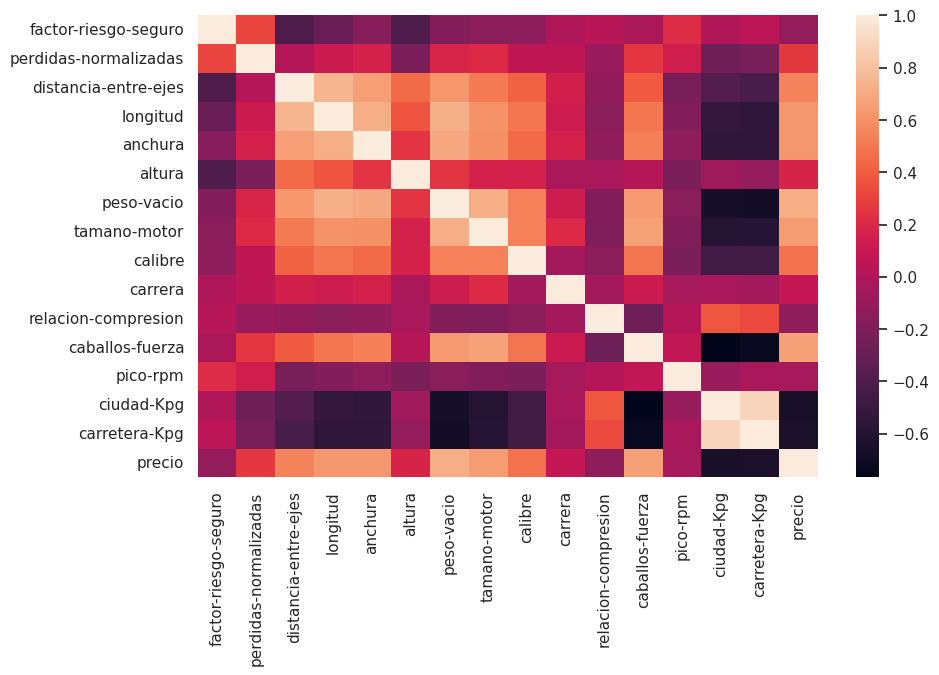

In [313]:
sns.heatmap(correlationKendall,xticklabels=correlationKendall.columns,
            yticklabels=correlationKendall.columns)

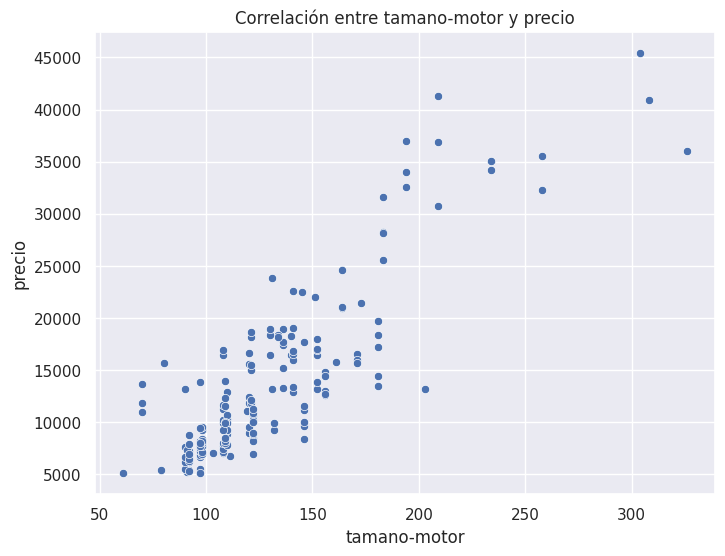

Coeficiente de correlación de Kendall: 0.6413617291317495


In [314]:
# prompt: visualizar la correlacion entre dos variables

# Selecciona las dos variables que deseas analizar
variable1 = 'tamano-motor'
variable2 = 'precio'

# Crea un scatter plot para visualizar la correlación
plt.figure(figsize=(8, 6))
sns.scatterplot(x=variable1, y=variable2, data=df)
plt.title(f'Correlación entre {variable1} y {variable2}')
plt.xlabel(variable1)
plt.ylabel(variable2)
plt.show()

# Calcula el coeficiente de correlación de Kendall
correlationKendall = df[variable1].corr(df[variable2], method='kendall')
print(f'Coeficiente de correlación de Kendall: {correlationKendall}')

## Analisis de Correlación: Spearman

In [315]:
from scipy import stats

corrSpearman = stats.spearmanr(df["precio"], df["tamano-motor"])
print("p-value:\t", corrSpearman[1])
print("cor:\t\t", corrSpearman[0])

p-value:	 8.685236981925344e-48
cor:		 0.8077705395447443


In [316]:
numeric_df = df.select_dtypes(include=['number'])
correlationSpearman = numeric_df.corr(method='spearman')
correlationSpearman

,factor-riesgo-seguro,perdidas-normalizadas,distancia-entre-ejes,longitud,anchura,altura,peso-vacio,tamano-motor,calibre,carrera,relacion-compresion,caballos-fuerza,pico-rpm,ciudad-Kpg,carretera-Kpg,precio
factor-riesgo-seguro,1.000000,0.401511,-0.531609,-0.393566,-0.245993,-0.516592,-0.261681,-0.179752,-0.173477,-0.007243,0.032861,-0.018915,0.282169,-0.006792,0.065495,-0.150522
perdidas-normalizadas,0.401511,1.000000,0.017693,0.168528,0.226722,-0.297865,0.278092,0.295791,0.099173,0.087099,-0.131688,0.375177,0.195008,-0.392123,-0.351537,0.389423
distancia-entre-ejes,-0.531609,0.017693,1.000000,0.914101,0.811550,0.624590,0.773485,0.656338,0.543835,0.220710,-0.144017,0.521381,-0.311742,-0.511956,-0.557713,0.683775
longitud,-0.393566,0.168528,0.914101,1.000000,0.886674,0.518876,0.893238,0.785223,0.639043,0.186875,-0.213138,0.681290,-0.262919,-0.686969,-0.714919,0.795599
anchura,-0.245993,0.226722,0.811550,0.886674,1.000000,0.339723,0.867884,0.773568,0.612237,0.238771,-0.163376,0.710713,-0.192581,-0.705943,-0.718958,0.795920
altura,-0.516592,-0.297865,0.624590,0.518876,0.339723,1.000000,0.348772,0.202378,0.216023,-0.030894,-0.019266,0.022146,-0.293923,-0.083800,-0.148146,0.253477
peso-vacio,-0.261681,0.278092,0.773485,0.893238,0.867884,0.348772,1.000000,0.877003,0.700862,0.168010,-0.228713,0.815453,-0.234573,-0.819696,-0.841197,0.890041
tamano-motor,-0.179752,0.295791,0.656338,0.785223,0.773568,0.202378,0.877003,1.000000,0.699187,0.298576,-0.245861,0.829439,-0.269545,-0.737767,-0.728778,0.807771
calibre,-0.173477,0.099173,0.543835,0.639043,0.612237,0.216023,0.700862,0.699187,1.000000,-0.076108,-0.171774,0.650656,-0.292697,-0.617673,-0.623515,0.629209
carrera,-0.007243,0.087099,0.220710,0.186875,0.238771,-0.030894,0.168010,0.298576,-0.076108,1.000000,-0.072267,0.146545,-0.076776,-0.039675,-0.039655,0.108102


<Axes: >

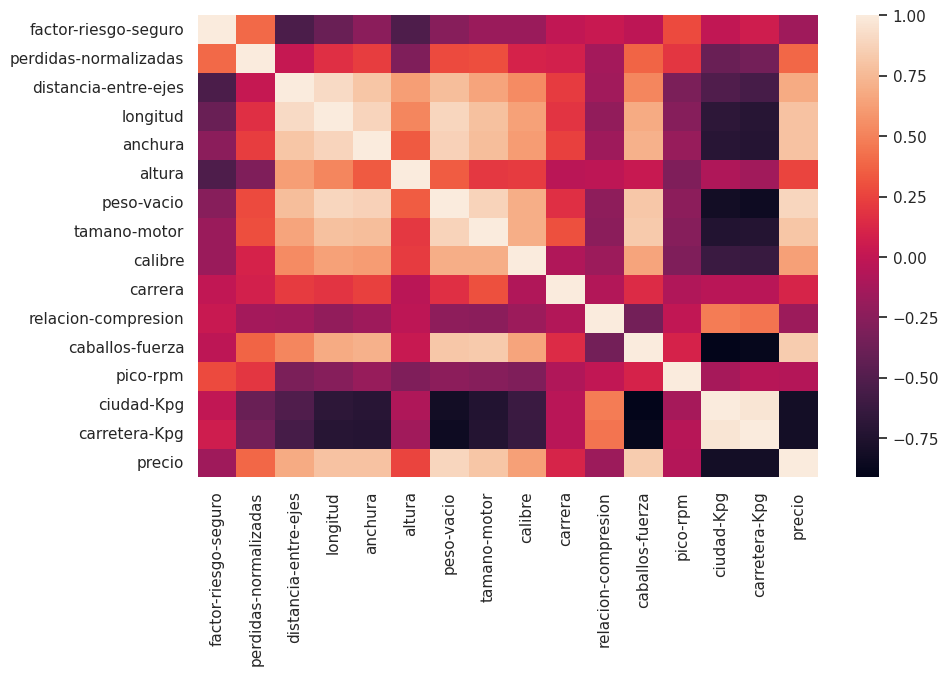

In [317]:
sns.heatmap(correlationSpearman,xticklabels=correlationSpearman.columns,
            yticklabels=correlationSpearman.columns)

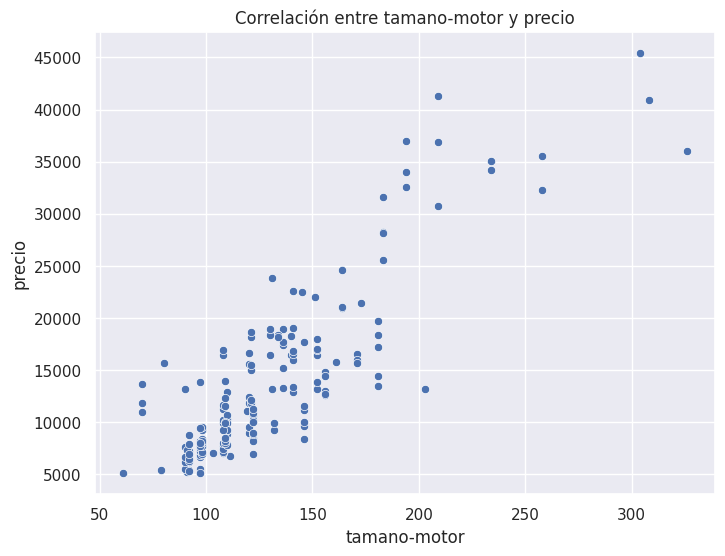

Coeficiente de correlación de Spearman: 0.8077705395447443


In [318]:
# prompt: visualizar la correlacion entre dos variables

# Selecciona las dos variables que deseas analizar
variable1 = 'tamano-motor'
variable2 = 'precio'

# Crea un scatter plot para visualizar la correlación
plt.figure(figsize=(8, 6))
sns.scatterplot(x=variable1, y=variable2, data=df)
plt.title(f'Correlación entre {variable1} y {variable2}')
plt.xlabel(variable1)
plt.ylabel(variable2)
plt.show()

# Calcula el coeficiente de correlación de Spearman
correlationSpearman = df[variable1].corr(df[variable2], method='spearman')
print(f'Coeficiente de correlación de Spearman: {correlationSpearman}')

In [319]:
print(f'Coeficiente de correlación de Spearman: {correlationSpearman}')
print(f'Coeficiente de correlación de Kendall: {correlationKendall}')
print(f'Coeficiente de correlación de Pearson: {correlationPearson}')

Coeficiente de correlación de Spearman: 0.8077705395447443
Coeficiente de correlación de Kendall: 0.6413617291317495
Coeficiente de correlación de Pearson: 0.861546091207975


# Los pasos realizados hasta esta tarea se pueden resumir en las siguientes etapas:

 1. Limpieza de datos:
    - Identificación y manejo de valores faltantes en varias columnas, incluyendo 'precio', 'caballos-fuerza', 'perdidas-normalizadas', 'num-puertas', y 'pico-rpm'.
    - Reemplazo de valores faltantes por la media o la moda según corresponda.
    - Eliminación de filas con valores faltantes en la columna 'precio'.
    - Conversión de tipos de datos a formatos apropiados (float, int).

 2. Transformación de datos:
    - Conversión de millas por galón a kilómetros por galón para las columnas 'millas_por_galon_ciudad' y 'millas_por_galon_carretera'.
    - Renombramiento de columnas para mayor claridad.

 3. Análisis exploratorio de datos:
    - Visualización de la distribución de variables utilizando histogramas y gráficos de caja.
    - Creación de gráficos de dispersión para explorar relaciones entre variables.
    - Análisis de la correlación entre variables numéricas utilizando mapas de calor y coeficientes de correlación.

 4. Análisis de correlación:
    - Cálculo de coeficientes de correlación de Pearson, Kendall y Spearman para variables seleccionadas.
    - Visualización de la correlación utilizando gráficos de dispersión y mapas de calor.
    - Comparación entre los coeficientes de correlación calcualdados

 En resumen, se ha realizado un proceso de limpieza, transformación y análisis exploratorio de
 datos para preparar el conjunto de datos para su uso en análisis posteriores o modelado predictivo.
 Se ha prestado especial atención a la identificación y manejo de valores faltantes,
 la corrección de formatos de datos y la exploración de relaciones entre variables.

# Conclusiones

El análisis exploratorio de datos y el preprocesamiento realizado revelan información crucial sobre el conjunto de datos de automóviles. Se abordaron los valores faltantes utilizando estrategias de imputación, mientras que las transformaciones de datos aseguraron la coherencia y la interpretabilidad.

Los análisis de correlación, revelaron fuertes relaciones positivas entre variables como la distancia entre ejes, la longitud, el ancho, el peso en vacío, el tamaño del motor, la potencia y el precio, lo que permitió orientar de forma objetiva el analisis.

El coeficiente de correlación de Pearson para "precio" y "tamaño del motor" fue de 0.8615, lo que indica una fuerte relación lineal positiva, evidenciado en las graficas de dispersión en la que relacionan las dos variables. Los coeficientes de Kendall y Spearman también confirmaron esta fuerte asociación, con valores: Coeficiente de correlación de Spearman: 0.8077705395447443
Coeficiente de correlación de Kendall: 0.6413617291317495
Coeficiente de correlación de Pearson: 0.861546091207975

Estos hallazgos sugieren que variables como el tamaño del motor, la potencia y las dimensiones del vehículo son predictores significativos del precio del automóvil. Además, el consumo de combustible muestra una relación inversa con el tamaño del motor y la potencia.

Este análisis proporciona una base sólida para el desarrollo de modelos predictivos para estimar el precio de los automóviles en función de sus características.
